In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=loadmat("cancerWTrain.mat")

In [3]:
X=pd.DataFrame(data["cancerTrainX"].T)
Y=pd.DataFrame(data["cancerTrainY"].T)

In [4]:
Y.head()

,0
0,0
1,0
2,1
3,1
4,1


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [7]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
71,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.13670,0.1822,0.08669,0.08611,0.2102,0.06784
44,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.14280,0.2510,0.21230,0.09861,0.2289,0.08278
220,13.90,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,0.1813,0.05536,...,15.14,21.80,101.20,718.9,0.09384,0.2006,0.13840,0.06222,0.2679,0.07698
65,13.20,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,0.1487,0.05635,...,13.94,27.82,88.28,602.0,0.11010,0.1508,0.22980,0.04970,0.2767,0.07198
155,13.90,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.1415,0.16730,0.08150,0.2356,0.07603


In [8]:
import numpy as np
from sklearn.decomposition import PCA

In [9]:
pca=PCA(n_components=15)
x_train=pca.fit_transform(x_train)
x_test=pca.fit_transform(x_test)
#x_train=np.sqrt(x_train)


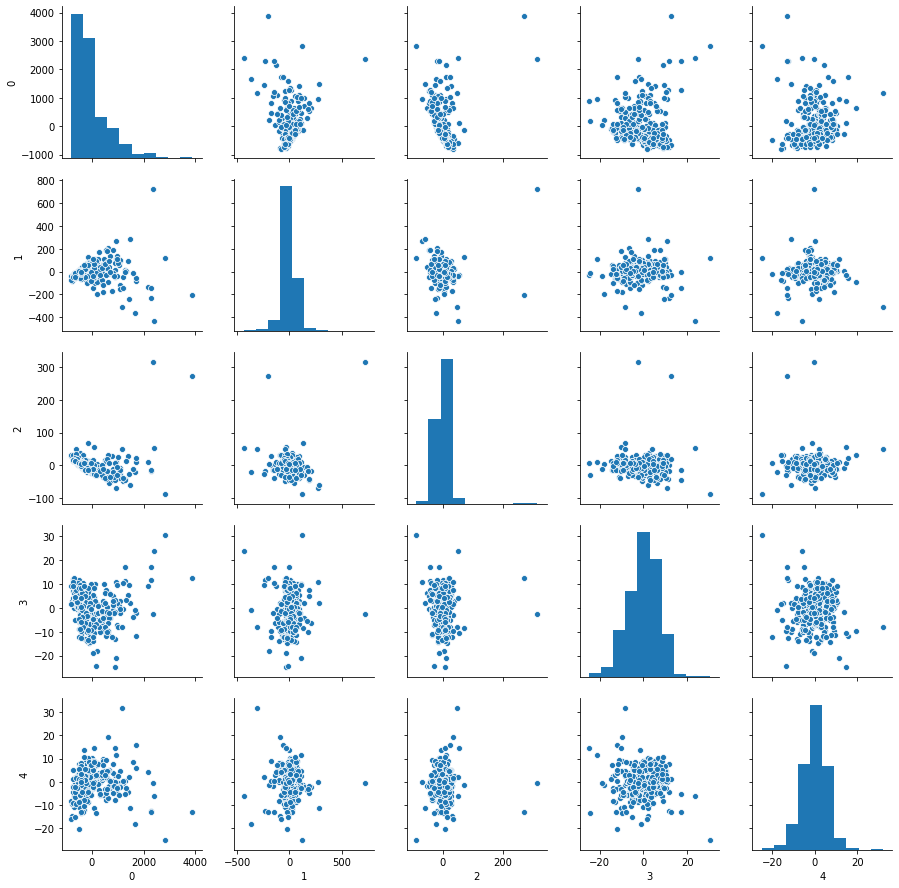

In [10]:
x_train1=pd.DataFrame(x_train[:,:5])
sns.pairplot(x_train1)

In [11]:
x1=x_train

In [12]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.fit_transform(x_test)

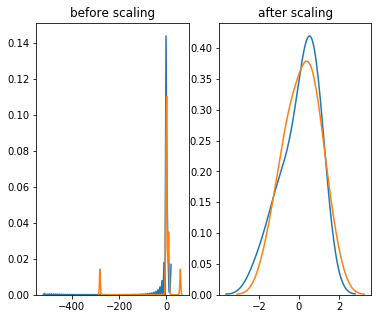

In [13]:
import seaborn as sns
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title("before scaling")
sns.kdeplot(x1[0],ax=ax1)
sns.kdeplot(x1[-1],ax=ax1)
ax2.set_title("after scaling")
sns.kdeplot(x_train[0],ax=ax2)
sns.kdeplot(x_train[-1],ax=ax2)

In [14]:
#x_train.

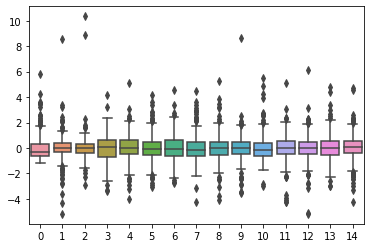

In [15]:
from pandas.plotting import scatter_matrix
import seaborn as sns
#scatter_matrix(x_train)
sns.boxplot(data=x_train)
plt.show()


In [16]:
print(y_train)

     0
71   0
44   0
220  0
65   0
155  0
..  ..
355  0
17   1
19   0
76   1
89   0

[320 rows x 1 columns]


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [18]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('svc',SVC()))
models.append(('NB',GaussianNB()))
models.append(('decision tree',DecisionTreeClassifier()))
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    #print("\n")
    #print(name,cv_results)
    msg="%s;%f(%f)"%(name,cv_results.mean(),cv_results.std())
    #print("\n")
    print(msg)
    
    

LR;0.962500(0.033657)
KNN;0.828125(0.081789)
svc;0.946875(0.031406)
NB;0.909375(0.038145)
decision tree;0.903125(0.042962)


In [19]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred=logistic.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
#cm=confusion_matrix()
print(confusion_matrix(y_test,y_pred))
print("15,,LR,accuracy is:",accuracy_score(y_test,y_pred))
y_train_pred=logistic.predict(x_train)
print("accuracy of train data set for 10",accuracy_score(y_train,y_train_pred))

[[44  8]
 [ 9 19]]
15,,LR,accuracy is: 0.7875
accuracy of train data set for 10 0.98125


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        52
           1       0.70      0.68      0.69        28

    accuracy                           0.79        80
   macro avg       0.77      0.76      0.76        80
weighted avg       0.79      0.79      0.79        80



In [23]:
logistic.coef_

array([[ 4.26063152, -0.01831311, -0.84544883, -2.34597174,  0.37293771,
         0.02405966,  0.02579675,  0.16596342, -0.22904188, -0.95370503,
         0.80818912, -0.00997063,  0.34868052,  0.4994934 ,  0.04539155]])

In [24]:
logistic.intercept_

array([-1.1259081])

In [25]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_sgd=sgd.predict(x_test)

In [29]:
print(accuracy_score(y_test,y_sgd))

0.8375


In [30]:
print(classification_report(y_test,y_sgd))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        52
           1       0.76      0.79      0.77        28

    accuracy                           0.84        80
   macro avg       0.82      0.83      0.82        80
weighted avg       0.84      0.84      0.84        80

